## What is the most optimal skill to learn for Data Analysts?

##### Methodology

1. Continue from last notebook to find percent of postings with skill
2. Visualize median salary vs percent skill demand
3. (Optional) Determine if certain technologies are more prevalent

##### Original Exploration

[15_Matplotlib_Scatter_Plot.ipynb](2_Advance\15_Matplotlib_Scatter_Plot.ipynb)

[16_Matplotlib_Advanced_Customization.ipynb](2_Advance\16_Matplotlib_Advanced_Customization.ipynb)

### Import Libraries and Data

In [25]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt


# lodaing data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

#data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

### Clean Data

Filters the original dataset to only get rows where the job title is 'Data Scientist' and 'Data Analyst' and the country is 'United Kingdom', to create a new DataFrame df_DS_UK and df_DA_UK. Drop NaN values from the 'salary_year_avg' column. Then it uses the explode method on the job_skills column to create a new row in a new DataFrame (df_DA_US_exploded) and (df_DS_UK_exploded) for each skill associated with a job. Finally, it displays the first 5 entries of the salary_year_avg and job_skills columns.

In [26]:
df_DS_UK = df[(df['job_title_short'] == 'Data Scientist') & (df['job_country'] == 'United Kingdom')].copy()

# Drop NaN values from the 'salary_year_avg' column for accurate visualization
df_DS_UK = df_DS_UK.dropna(subset=['salary_year_avg'])

df_DS_UK_exploded = df_DS_UK.explode('job_skills')

df_DS_UK_exploded[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
1107,157500.0,python
1107,157500.0,numpy
1107,157500.0,pandas
1107,157500.0,scikit-learn
13764,109500.0,excel


In [27]:
df_DA_UK = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United Kingdom')].copy()

# Drop NaN values from the 'salary_year_avg' column for accurate visualization
df_DA_UK = df_DA_UK.dropna(subset=['salary_year_avg'])

df_DA_UK_exploded = df_DA_UK.explode('job_skills')

df_DA_UK_exploded[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
2602,51014.0,excel
2602,51014.0,word
2602,51014.0,outlook
16526,100500.0,sql
16526,100500.0,jupyter


### Calculate Percent of Job Postings that Have Skills

Group the data by job skills and calculates the count and median salary for each skill, sorting the results in descending order by count. It then renames the columns. Calculates the percentage that each skill count represents out of the total number of Data Analyst jobs. Finally, filter out any skills that don't have any jobs associated with them.

In [28]:
# using df_DS find the count of skills and also the median salary for each skill
df_DS_skills = df_DS_UK_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_DS_skills = df_DS_skills.rename(columns={'count': 'skill_count', 'median': 'median_salary'})

DS_job_count = len(df_DS_UK)  # Find count of Data Scientist jobs in UK with salary info

df_DS_skills['skill_percent'] = df_DS_skills['skill_count'] / DS_job_count * 100

df_DS_skills = df_DS_skills[df_DS_skills['skill_count'] > 0]

df_DS_skills

,skill_count,median_salary,skill_percent
job_skills,,,
python,50,89885.0,66.666667
sql,46,97985.0,61.333333
aws,22,88128.0,29.333333
r,18,113360.5,24.000000
tableau,15,111500.0,20.000000
...,...,...,...
sql server,1,113500.0,1.333333
trello,1,89100.0,1.333333
unix,1,87705.0,1.333333


In [29]:
# using df_DA find the count of skills and also the median salary for each skill
df_DA_skills = df_DA_UK_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_DA_skills = df_DA_skills.rename(columns={'count': 'skill_count', 'median': 'median_salary'})

DA_job_count = len(df_DA_UK)  # Find count of Data Analyst jobs in UK with salary info

df_DA_skills['skill_percent'] = df_DA_skills['skill_count'] / DA_job_count * 100

df_DA_skills = df_DA_skills[df_DA_skills['skill_count'] > 0]

df_DA_skills

,skill_count,median_salary,skill_percent
job_skills,,,
sql,33,98500.0,45.833333
excel,29,75550.0,40.277778
python,25,89100.0,34.722222
tableau,13,100500.0,18.055556
r,9,77017.5,12.500000
...,...,...,...
shell,1,156500.0,1.388889
terminal,1,53014.0,1.388889
tensorflow,1,177283.0,1.388889


### Median Salary vs Percent Skill Demand

Filters for Data Analyst skills that exceed a certain percentage (skill_limit).

In [30]:
skill_limit = 5

df_DS_skills_high_demand = df_DS_skills[df_DS_skills['skill_percent'] > skill_limit]

df_DS_skills_high_demand

,skill_count,median_salary,skill_percent
job_skills,,,
python,50,89885.00,66.666667
sql,46,97985.00,61.333333
aws,22,88128.00,29.333333
r,18,113360.50,24.000000
tableau,15,111500.00,20.000000
excel,11,80850.00,14.666667
gcp,9,131867.00,12.000000
looker,9,113500.00,12.000000
numpy,9,88128.00,12.000000


In [31]:
skill_limit = 5

df_DA_skills_high_demand = df_DA_skills[df_DA_skills['skill_percent'] > skill_limit]

df_DA_skills_high_demand

,skill_count,median_salary,skill_percent
job_skills,,,
sql,33,98500.0,45.833333
excel,29,75550.0,40.277778
python,25,89100.0,34.722222
tableau,13,100500.0,18.055556
r,9,77017.5,12.500000
go,9,71000.0,12.500000
sas,8,80007.0,11.111111
power bi,7,89100.0,9.722222
looker,6,96012.5,8.333333


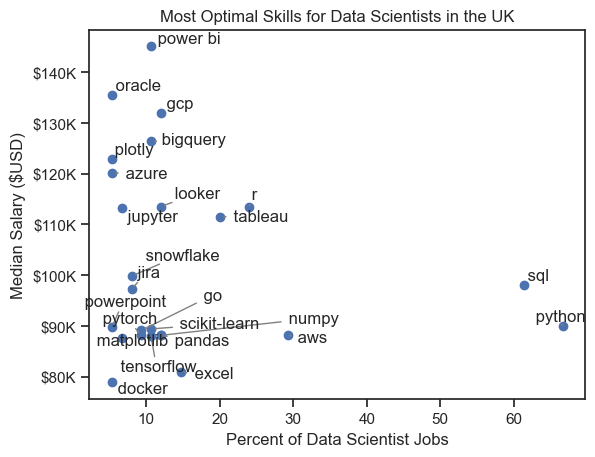

In [32]:
from adjustText import adjust_text

plt.scatter(df_DS_skills_high_demand['skill_percent'], df_DS_skills_high_demand['median_salary'])
plt.xlabel('Percent of Data Scientist Jobs')
plt.ylabel('Median Salary ($USD)')  # Assuming this is the label you want for y-axis
plt.title('Most Optimal Skills for Data Scientists in the UK')

# Get current axes, set limits, and format axes
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))  # Example formatting y-axis

# Add labels to points and collect them in a list
texts = []
for i, txt in enumerate(df_DS_skills_high_demand.index):
    texts.append(plt.text(df_DS_skills_high_demand['skill_percent'].iloc[i], df_DS_skills_high_demand['median_salary'].iloc[i], " " + txt))

# Adjust text to avoid overlap and add arrows
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

plt.show()

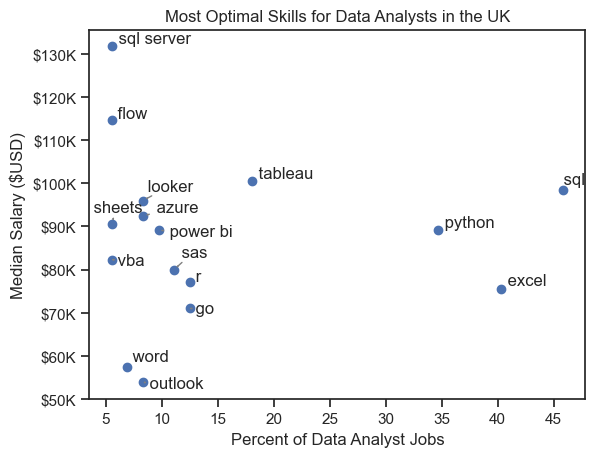

In [33]:
from adjustText import adjust_text

plt.scatter(df_DA_skills_high_demand['skill_percent'], df_DA_skills_high_demand['median_salary'])
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Salary ($USD)')  # Assuming this is the label you want for y-axis
plt.title('Most Optimal Skills for Data Analysts in the UK')

# Get current axes, set limits, and format axes
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))  # Example formatting y-axis

# Add labels to points and collect them in a list
texts = []
for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i], df_DA_skills_high_demand['median_salary'].iloc[i], " " + txt))

# Adjust text to avoid overlap and add arrows
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

plt.show()

### Coloring by Technology

We're going to add color labels based on technology.

Removes duplicate entries and any rows with missing values. Then, it combines all dictionary entries into a single dictionary, summing values for keys that repeat across entries. To ensure each key's values are unique, it converts the values to a set and then back to a list. The final result is a dictionary where each key represents a skill and each value is a list of unique attributes associated with that skill.

In [34]:
df_technology = df['job_type_skills'].copy()

# remove duplicates
df_technology = df_technology.drop_duplicates()

# remove NaN values
df_technology = df_technology.dropna()

# combine all dictionaries into one
technology_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row)  # convert string to dictionary
    for key, value in row_dict.items():
        if key in technology_dict:  # if key already exists in technology_dict, add value to existing value
            technology_dict[key] += value
        else:                       # if key does not exist in technology_dict, add key and value
            technology_dict[key] = value

# remove duplicates by converting values to set then back to list
for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))

technology_dict

{'analyst_tools': ['nuix',
  'msaccess',
  'excel',
  'esquisse',
  'powerbi',
  'powerpoint',
  'splunk',
  'dax',
  'sharepoint',
  'sas',
  'sheets',
  'alteryx',
  'cognos',
  'microstrategy',
  'looker',
  'tableau',
  'word',
  'visio',
  'spreadsheet',
  'spss',
  'ssis',
  'datarobot',
  'power bi',
  'sap',
  'outlook',
  'ms access',
  'qlik',
  'ssrs'],
 'programming': ['ruby',
  'erlang',
  'sql',
  'vba',
  'php',
  'mongodb',
  'java',
  'f#',
  'pascal',
  'haskell',
  'lisp',
  'groovy',
  'crystal',
  'mongo',
  'sas',
  'perl',
  'dart',
  'c',
  't-sql',
  'visualbasic',
  'python',
  'kotlin',
  'elixir',
  'visual basic',
  'sass',
  'typescript',
  'css',
  'apl',
  'go',
  'cobol',
  'fortran',
  'ocaml',
  'scala',
  'lua',
  'swift',
  'c++',
  'solidity',
  'delphi',
  'golang',
  'clojure',
  'shell',
  'r',
  'matlab',
  'powershell',
  'rust',
  'javascript',
  'vb.net',
  'nosql',
  'assembly',
  'bash',
  'julia',
  'objective-c',
  'no-sql',
  'html',
  

This code converts a dictionary into a pandas DataFrame, then explodes the 'skills' column, creating multiple rows for each 'technology' entry if it contains multiple skills.

In [35]:
# turn dictionary into dataframe
df_technology = pd.DataFrame(list(technology_dict.items()), columns=['technology', 'skills'])

df_technology = df_technology.explode('skills')

df_technology

,technology,skills
0,analyst_tools,nuix
0,analyst_tools,msaccess
0,analyst_tools,excel
0,analyst_tools,esquisse
0,analyst_tools,powerbi
...,...,...
9,sync,rocketchat
9,sync,webex
9,sync,zoom
9,sync,twilio


Merges  DataFrames, df_DA_skills and df_technology & df_DS_Skills and df_technology based on the columns 'job_skills' and 'skills' respectively, creating a new DataFrame df_DA_skills_tech and df_DS_skills_tech.

In [36]:
# merge df_DA_skills and df_technology
df_DS_skills_tech = df_DS_skills.merge(df_technology, left_on='job_skills', right_on='skills')

df_DS_skills_tech

,skill_count,median_salary,skill_percent,technology,skills
0,50,89885.0,66.666667,programming,python
1,46,97985.0,61.333333,programming,sql
2,22,88128.0,29.333333,cloud,aws
3,18,113360.5,24.000000,programming,r
4,15,111500.0,20.000000,analyst_tools,tableau
...,...,...,...,...,...
65,1,113500.0,1.333333,databases,sql server
66,1,89100.0,1.333333,async,trello
67,1,87705.0,1.333333,os,unix
68,1,139216.0,1.333333,os,windows


In [37]:
# merge df_DA_skills and df_technology
df_DA_skills_tech = df_DA_skills.merge(df_technology, left_on='job_skills', right_on='skills')

df_DA_skills_tech

,skill_count,median_salary,skill_percent,technology,skills
0,33,98500.0,45.833333,programming,sql
1,29,75550.0,40.277778,analyst_tools,excel
2,25,89100.0,34.722222,programming,python
3,13,100500.0,18.055556,analyst_tools,tableau
4,9,77017.5,12.500000,programming,r
...,...,...,...,...,...
59,1,156500.0,1.388889,programming,shell
60,1,53014.0,1.388889,other,terminal
61,1,177283.0,1.388889,libraries,tensorflow
62,1,98500.0,1.388889,analyst_tools,ssrs


Filters df_DS_skills_tech and df_DA_skills_tech to select rows where the 'percent' column exceeds a specified threshold, storing the result in df_DS_skills_tech_high_demand and df_DA_skills_tech_high_demand.

In [38]:

df_DS_skills_tech_high_demand = df_DS_skills_tech[df_DS_skills_tech['skill_percent'] > skill_limit]

In [39]:

df_DA_skills_tech_high_demand = df_DA_skills_tech[df_DA_skills_tech['skill_percent'] > skill_limit]

Plot the results in a scatter plot, coloring the points based on the 'technology' column.

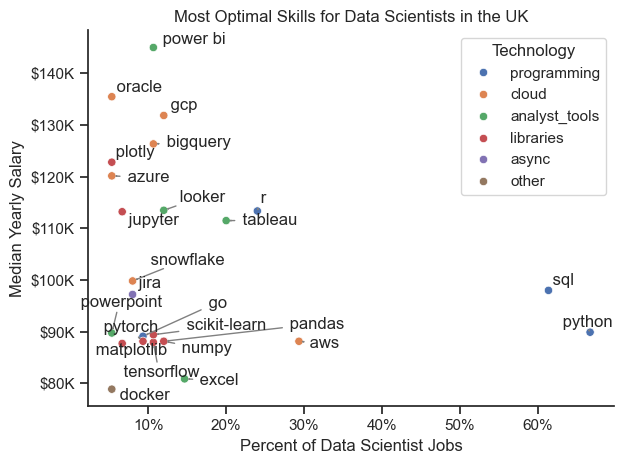

In [42]:
sns.scatterplot(
    data=df_DS_skills_tech_high_demand,
    x='skill_percent',
    y='median_salary',
    hue='technology'
)

sns.despine()
sns.set_theme(style='ticks')

df_DS_skills = df_DS_skills.reset_index()
df_DS_skills_tech = df_DS_skills.merge(
    df_technology, left_on='job_skills', right_on='skills'
).set_index('job_skills')

df_DS_skills_tech_high_demand = df_DS_skills_tech[df_DS_skills_tech['skill_percent'] > skill_limit]

texts = []
for skill, r in df_DS_skills_tech_high_demand.iterrows():
    texts.append(plt.text(r['skill_percent'], r['median_salary'], " " + skill))
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))


# Set axis labels, title, and legend
plt.xlabel('Percent of Data Scientist Jobs')
plt.ylabel('Median Yearly Salary')
plt.title('Most Optimal Skills for Data Scientists in the UK')
plt.legend(title='Technology')

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

# Adjust layout and display plot 
plt.tight_layout()
plt.show()

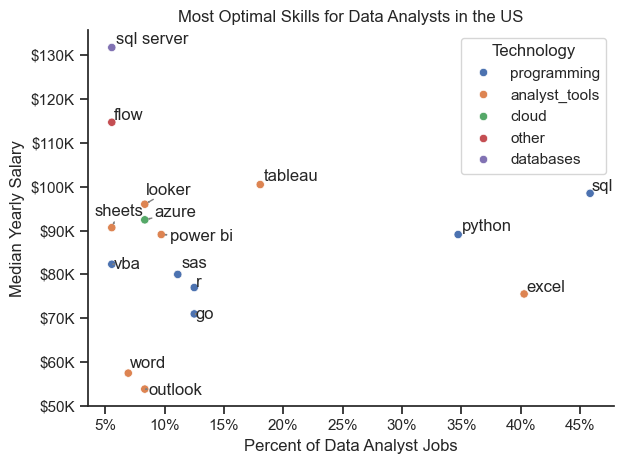

In [41]:
sns.scatterplot(
    data=df_DA_skills_tech_high_demand,
    x='skill_percent',
    y='median_salary',
    hue='technology'
)

sns.despine()
sns.set_theme(style='ticks')

# Prepare texts for adjustText
texts = []
for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i], df_DA_skills_high_demand['median_salary'].iloc[i], txt))

# Adjust text to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

# Set axis labels, title, and legend
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Yearly Salary')
plt.title('Most Optimal Skills for Data Analysts in the US')
plt.legend(title='Technology')

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

# Adjust layout and display plot 
plt.tight_layout()
plt.show()